In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
df = pd.read_csv('census-income.csv')

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.duplicated().sum()

24

In [40]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [41]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Unnamed: 14     32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [44]:
le = LabelEncoder()
sc = StandardScaler()

In [45]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

<Axes: >

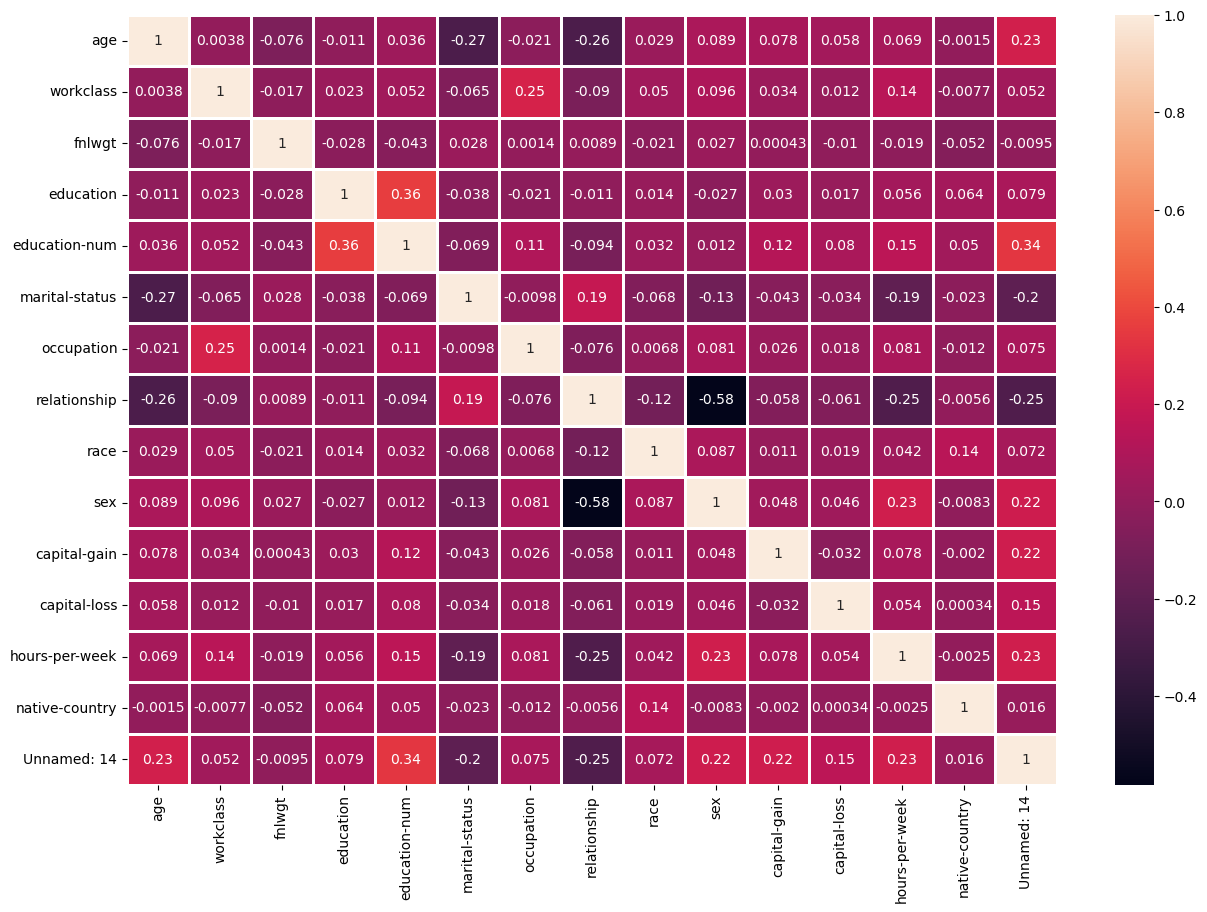

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=1,annot=True)

In [47]:
df.rename(columns={'Unnamed: 14' : 'Status'})

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Status
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32533,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32534,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32535,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [48]:
df.iloc[:,-1].value_counts()

Unnamed: 14
0    24698
1     7839
Name: count, dtype: int64

In [49]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1)

In [51]:
Xnew,ynew = smote.fit_resample(X,y)

In [52]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.20,random_state=42)

In [53]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)

In [55]:
rf.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=42)

In [56]:
ypred = rf.predict(Xtest)

In [57]:
df1 = pd.DataFrame({'True_Value':ytest,'Predicted_Value':ypred})

In [58]:
df1

,True_Value,Predicted_Value
4057,0,0
31167,1,0
22806,1,1
14572,0,0
11478,0,0
...,...,...
23995,1,1
13424,0,0
608,0,0
12000,1,1


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [63]:
c = confusion_matrix(ytest,ypred)
a = accuracy_score(ytest,ypred)
r = classification_report(ytest,ypred)

print(f'Confusion Matrix:\n{c}\n Accuracy Score:\t{a}\nClassification Report:\n\t{r}')

Confusion Matrix:
[[4443  520]
 [ 530 4387]]
 Accuracy Score:	1.0
Classification Report:
	              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4963
           1       0.89      0.89      0.89      4917

    accuracy                           0.89      9880
   macro avg       0.89      0.89      0.89      9880
weighted avg       0.89      0.89      0.89      9880

